# Multi Linear Regression

Q1) Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car

Price  -- Offer Price in EUROs	

Age_08_04 -- Age in months as in August 2004	

Mfg_Month -- Manufacturing month (1-12)	

Mfg_Year	-- Manufacturing Year

KM -- Accumulated Kilometers on odometer

Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)

HP -- Horse Power

Met_Color	 -- Metallic Color?  (Yes=1, No=0)

Color -- Color (Blue, Red, Grey, Silver, Black, etc.)

Automatic	-- Automatic ( (Yes=1, No=0)

cc -- Cylinder Volume in cubic centimeters

Doors -- Number of doors

Cylinders	-- Number of cylinders

Gears -- Number of gear positions

Quarterly_Tax -- Quarterly road tax in EUROs

Weight -- Weight in Kilograms

Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)

BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)

Guarantee_Period -- 	Guarantee period in months

ABS -- Anti-Lock Brake System (Yes=1, No=0)

Airbag_1 -- Driver_Airbag  (Yes=1, No=0)

Airbag_2 -- Passenger Airbag  (Yes=1, No=0)

Airco -- Airconditioning  (Yes=1, No=0)

Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)

Boardcomputer -- Boardcomputer  (Yes=1, No=0)

CD_Player -- CD Player  (Yes=1, No=0)

Central_Lock -- Central Lock  (Yes=1, No=0)

Powered_Windows -- Powered Windows  (Yes=1, No=0)

Power_Steering -- Power Steering  (Yes=1, No=0)

Radio -- Radio  (Yes=1, No=0)

Mistlamps	-- Mistlamps  (Yes=1, No=0)

Sport_Model -- Sport Model  (Yes=1, No=0)

Backseat_Divider -- Backseat Divider  (Yes=1, No=0)

Metallic_Rim --Metallic Rim  (Yes=1, No=0)

Radio_cassette -- Radio Cassette  (Yes=1, No=0)

Tow_Bar -- Tow Bar  (Yes=1, No=0)





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as smf
import statsmodels.formula.api as sm
import scipy.stats as stats
import scipy.stats as stat

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv(r"ToyotaCorolla.csv", encoding='ISO-8859-1', index_col=0)
print("Shape:",data.shape)
data.head()

Shape: (1436, 37)


,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0


### EDA and Data Visualization

In [4]:
print('\n Describe:');   print(data.describe())
print('\n Info:');   print(data.info())
print('\n Null values:');   print(data.isnull().sum())
print('\n Duplicated:');   print(data[data.duplicated()])


 Describe:
              Price    Age_08_04    Mfg_Month     Mfg_Year             KM  \
count   1436.000000  1436.000000  1436.000000  1436.000000    1436.000000   
mean   10730.824513    55.947075     5.548747  1999.625348   68533.259749   
std     3626.964585    18.599988     3.354085     1.540722   37506.448872   
min     4350.000000     1.000000     1.000000  1998.000000       1.000000   
25%     8450.000000    44.000000     3.000000  1998.000000   43000.000000   
50%     9900.000000    61.000000     5.000000  1999.000000   63389.500000   
75%    11950.000000    70.000000     8.000000  2001.000000   87020.750000   
max    32500.000000    80.000000    12.000000  2004.000000  243000.000000   

                HP    Met_Color    Automatic           cc        Doors  ...  \
count  1436.000000  1436.000000  1436.000000   1436.00000  1436.000000  ...   
mean    101.502089     0.674791     0.055710   1576.85585     4.033426  ...   
std      14.981080     0.468616     0.229441    424.38677

## Variable selection

### Find columns with the same values

In [5]:
# Find columns with the same values
columns_with_same_values = data.columns[data.nunique() == 1].tolist()

for column in columns_with_same_values:
    unique_values = data[column].unique()
    print(f"Unique values in the '{column}' column:")
    print(unique_values)
    print()

# excluding columns_with_same_values
data = data.drop(columns=columns_with_same_values)
print("excluded columns_with_same_values, shape:", data.shape)

Unique values in the 'Cylinders' column:
[4]

excluded columns_with_same_values, shape: (1436, 36)


In [6]:
# Discrete Variables Count
discrete_feature=[feature for feature in data.columns if len(data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))
print(discrete_feature)

# Continuous Feature Count
continuous_feature=[feature for feature in data.columns if data[feature].dtype!='O' and feature not in discrete_feature]
print('\nContinuous Feature Count {}'.format(len(continuous_feature)))
print(continuous_feature)

# Other Features Count
other_feature = [feature for feature in data.columns if feature not in discrete_feature and feature not in continuous_feature]
print('\nOther Features Count: {}'.format(len(other_feature)))
print('Other Features: {}'.format(other_feature))

# Numeric Data
numeric_data = data.select_dtypes(include='number')
print('\nNumeric Data Shape:', numeric_data.shape)
print(numeric_data.columns)

# Categorical Data
categorical_data = data.select_dtypes(include='object')
print('\nCategorical Data Shape:', categorical_data.shape)
print('Categorical Columns:', categorical_data.columns)

Discrete Variables Count: 31
['Mfg_Month', 'Mfg_Year', 'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Tow_Bar']

Continuous Feature Count 4
['Price', 'Age_08_04', 'KM', 'Weight']

Other Features Count: 1
Other Features: ['Model']

Numeric Data Shape: (1436, 33)
Index(['Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'HP', 'Met_Color',
       'Automatic', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight',
       'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS',
       'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer',
       'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering',
       'Radio', 'Mistlamps', 'S

### Variable selection based on correlation value

0.6 fixed based on so many trials to get the best outcome; below this value, 
there is little improvement in model accuracy; after some stage, accuracy is reduced.

length of significant_variables:  4
['Price', 'Age_08_04', 'Mfg_Year', 'Boardcomputer']


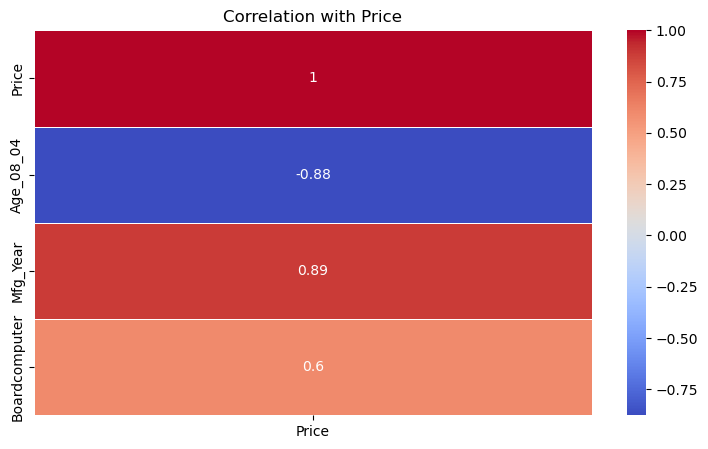

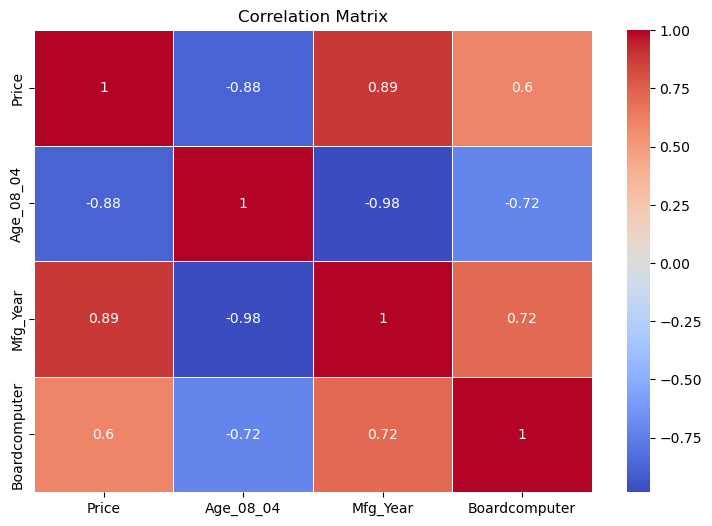

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

dependent_variable = 'Price'

# correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Filter columns with correlation greater than ---- with respect to 'Price'
significant_correlations = corr_matrix[abs(corr_matrix[dependent_variable]) > 0.6][[dependent_variable]]  # 0.6 fixed based on so much trails to get best outcome

significant_variables = significant_correlations.index.tolist()

print("length of significant_variables: ",len(significant_variables))
print(significant_variables)

# Plot
plt.figure(figsize=(9, 5))
sns.heatmap(significant_correlations, annot=True, cmap='coolwarm', linewidths=0.6)
plt.title('Correlation with {}'.format(dependent_variable))
plt.show()

# Correclation Plot of columns satisfied the conditions
corr_matrix = data[significant_variables].corr(numeric_only=True)
plt.figure(figsize=(9, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### Checking considered variable

In [8]:
# List of variables to check (As sugested in qstns)
variables_to_check = ["Price", "Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]

included_variables = [variable for variable in variables_to_check if variable in significant_variables]
print("Variables Included in Significant Variables:", included_variables)

not_present_variables = [variable for variable in variables_to_check if variable not in significant_variables]
print("Variables Not Present in Significant Variables:", not_present_variables)

additional_variables = [variable for variable in significant_variables if variable not in variables_to_check]
print("Additional Variables in Significant Variables:", additional_variables)

Variables Included in Significant Variables: ['Price', 'Age_08_04']
Variables Not Present in Significant Variables: ['KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']
Additional Variables in Significant Variables: ['Mfg_Year', 'Boardcomputer']


Considered additionally ['Mfg_Year', 'Automatic_airco', 'Boardcomputer']

### Considered variable to analysis

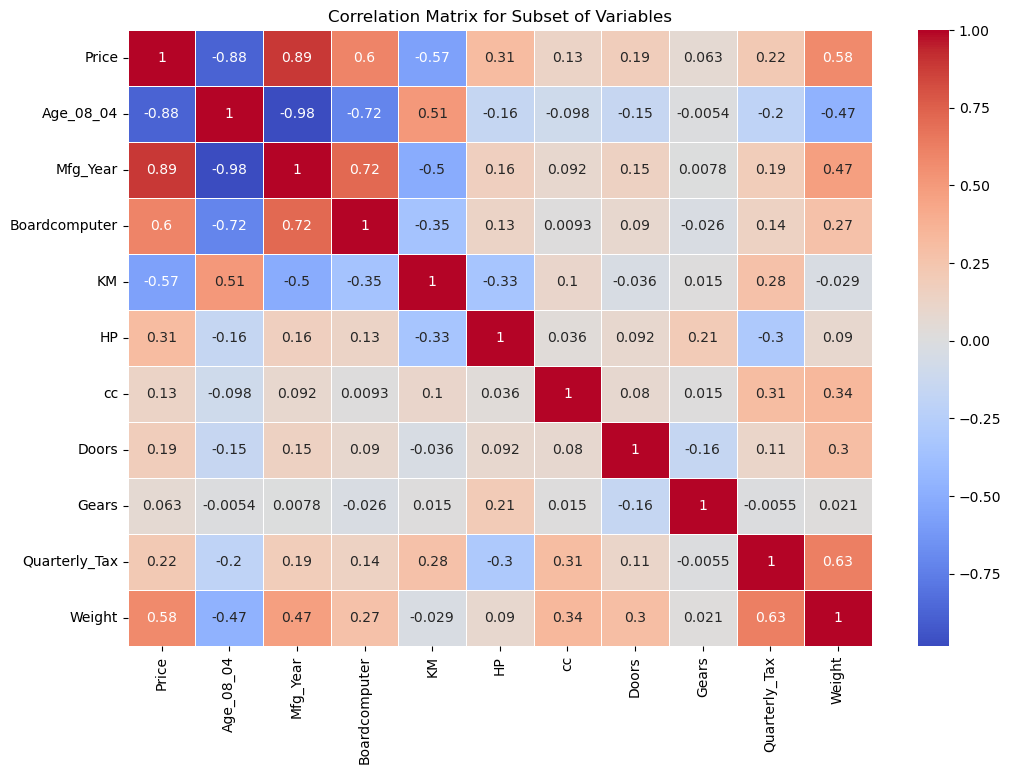

Shape: (1436, 11)


,Price,Age_08_04,Mfg_Year,Boardcomputer,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,,,
1,13500,23,2002,1,46986,90,2000,3,5,210,1165
2,13750,23,2002,1,72937,90,2000,3,5,210,1165
3,13950,24,2002,1,41711,90,2000,3,5,210,1165
4,14950,26,2002,1,48000,90,2000,3,5,210,1165
5,13750,30,2002,1,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...,...
1438,7500,69,1998,0,20544,86,1300,3,5,69,1025
1439,10845,72,1998,0,19000,86,1300,3,5,69,1015
1440,8500,71,1998,0,17016,86,1300,3,5,69,1015


In [9]:
# Considered variable to analysis
subset_variables = significant_variables + [var for var in not_present_variables if var not in significant_variables]
corr_matrix_subset = data[subset_variables].corr()

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_subset, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Subset of Variables')
plt.show()

# filtered data
data_filtered = data[subset_variables]
print("Shape:",data_filtered .shape)
data_filtered 

### Some manual Analysis

In [10]:
# print(data_filtered['Automatic_airco'].value_counts())
# print(data_filtered['Boardcomputer'].value_counts())
print(data_filtered['Doors'].value_counts())
print(data_filtered['Gears'].value_counts())
print(data_filtered['Mfg_Year'].value_counts())

Doors
5    674
3    622
4    138
2      2
Name: count, dtype: int64
Gears
5    1390
6      43
3       2
4       1
Name: count, dtype: int64
Mfg_Year
1999    441
1998    392
2000    225
2001    192
2002     87
2003     75
2004     24
Name: count, dtype: int64


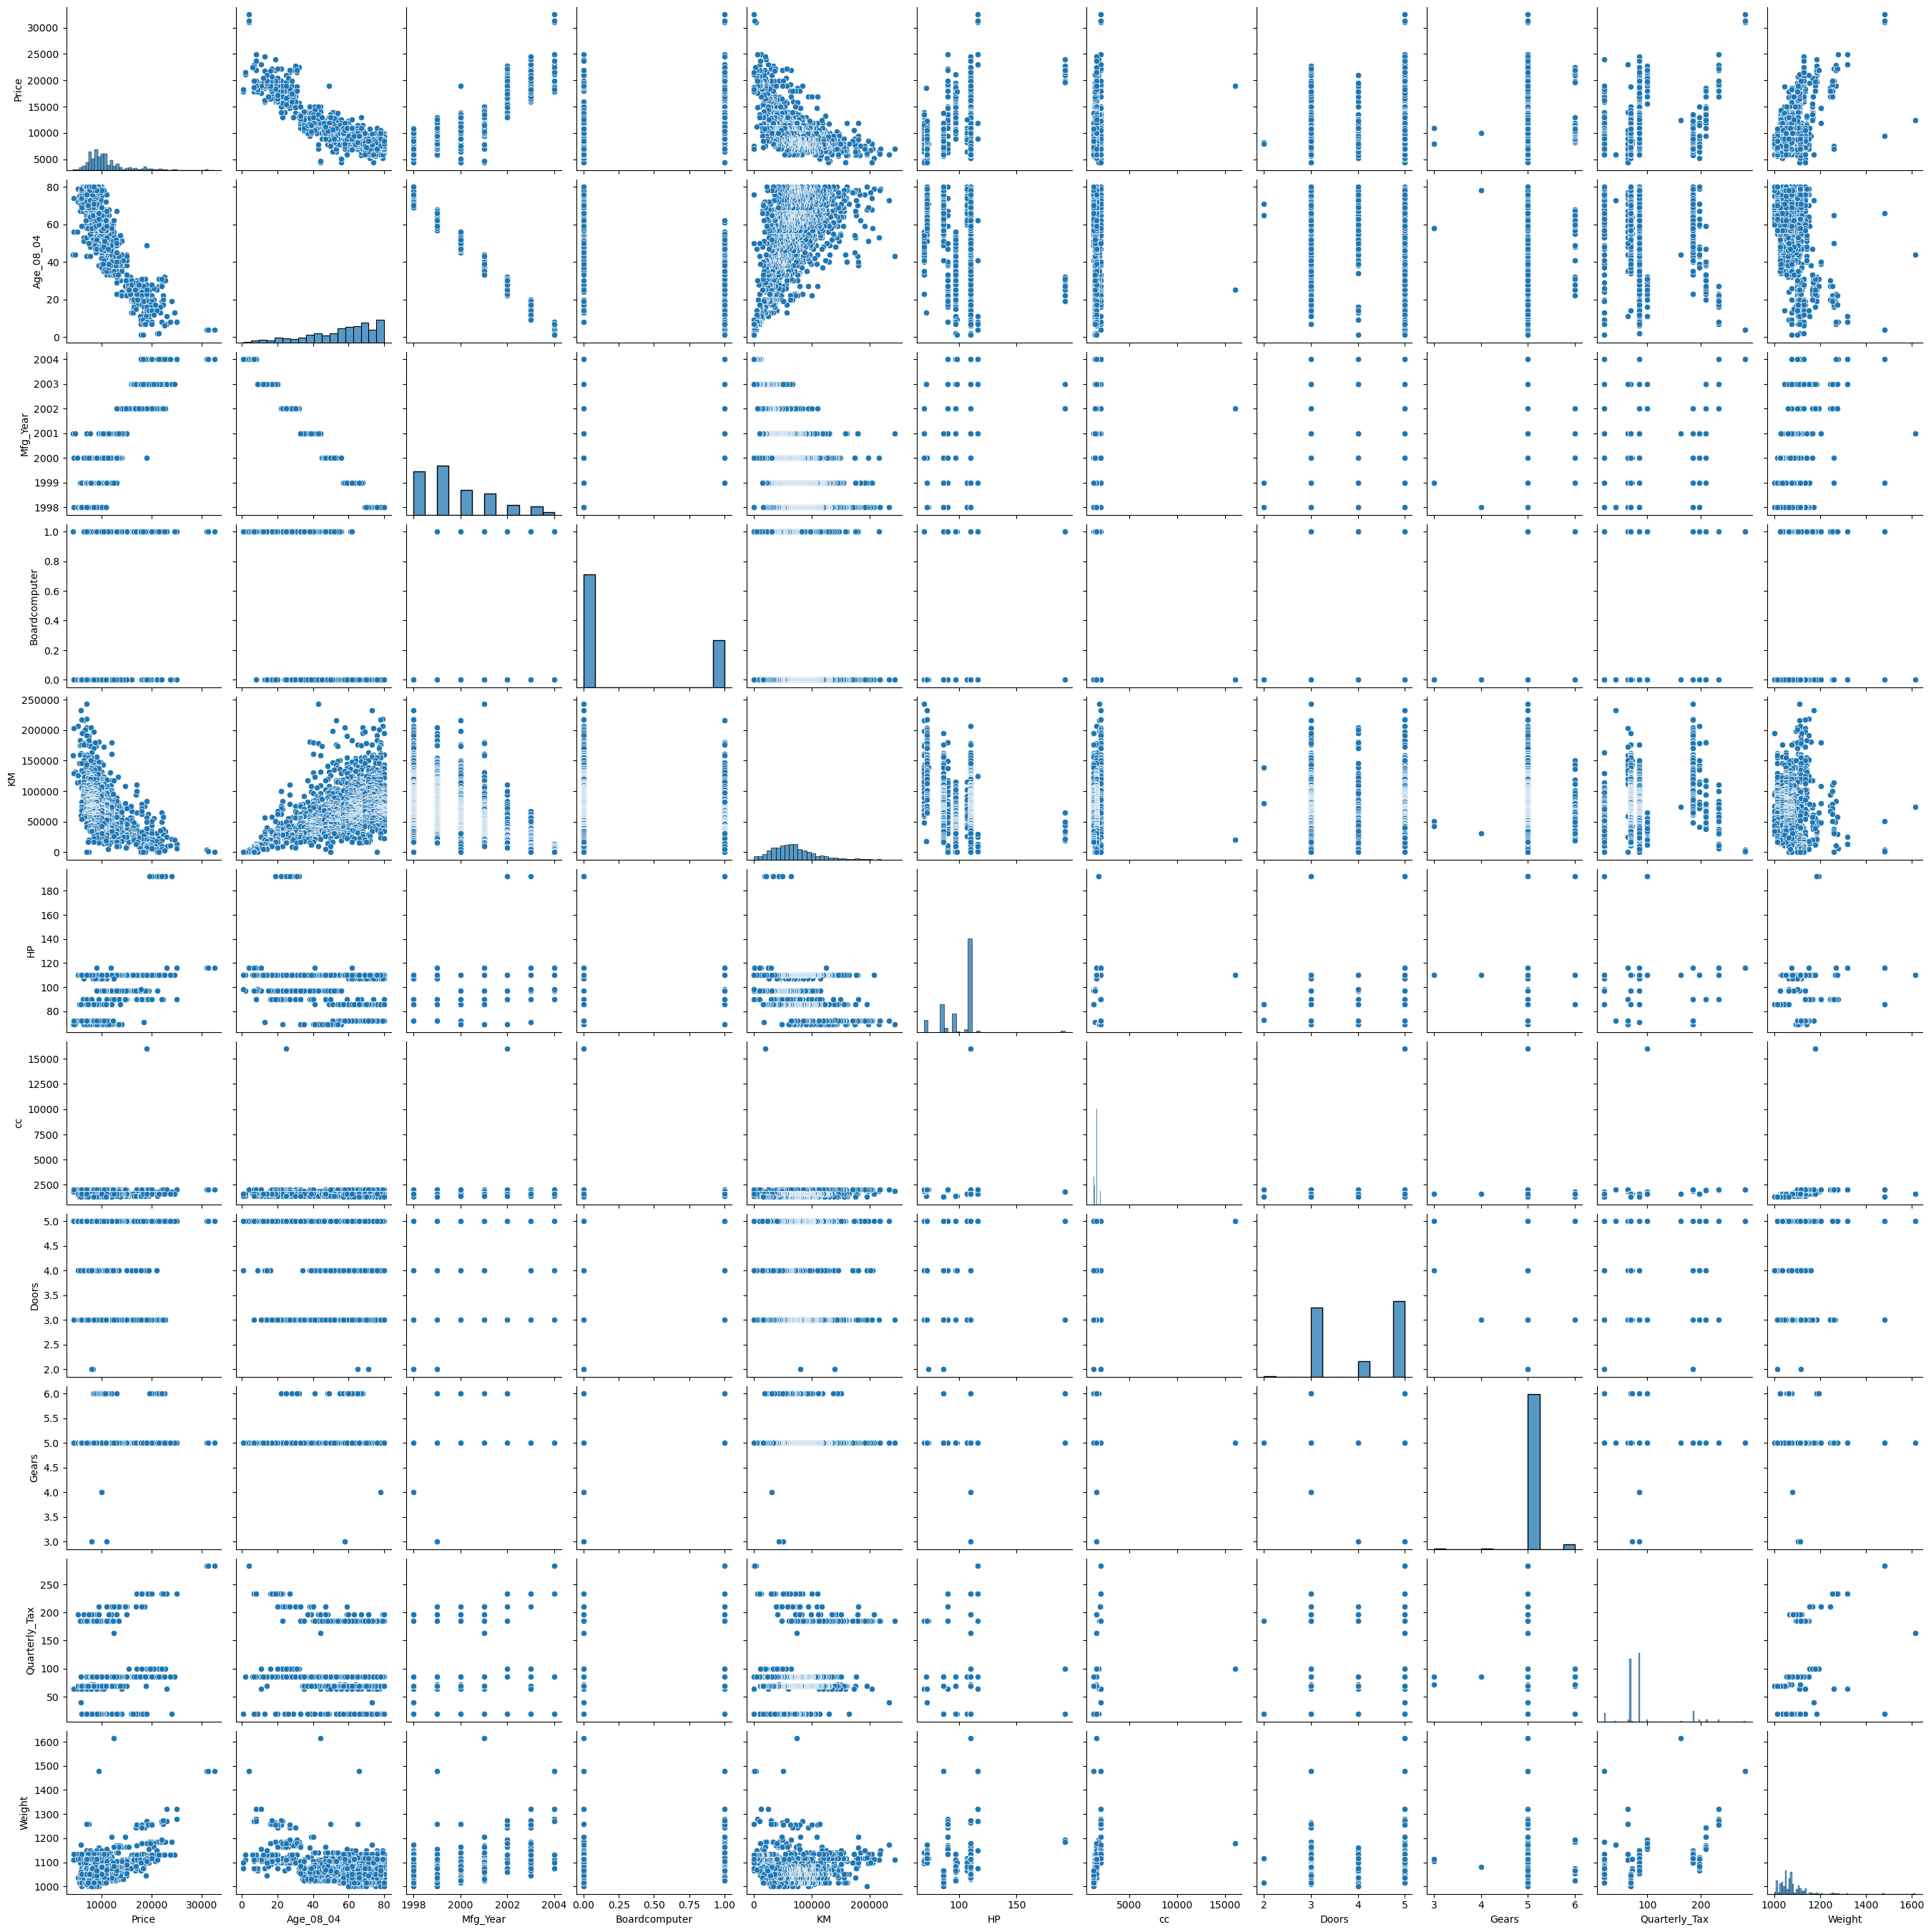

In [11]:
# relationship plot
sns.pairplot(data= data_filtered)
plt.show()

### Detect outliers and handle them

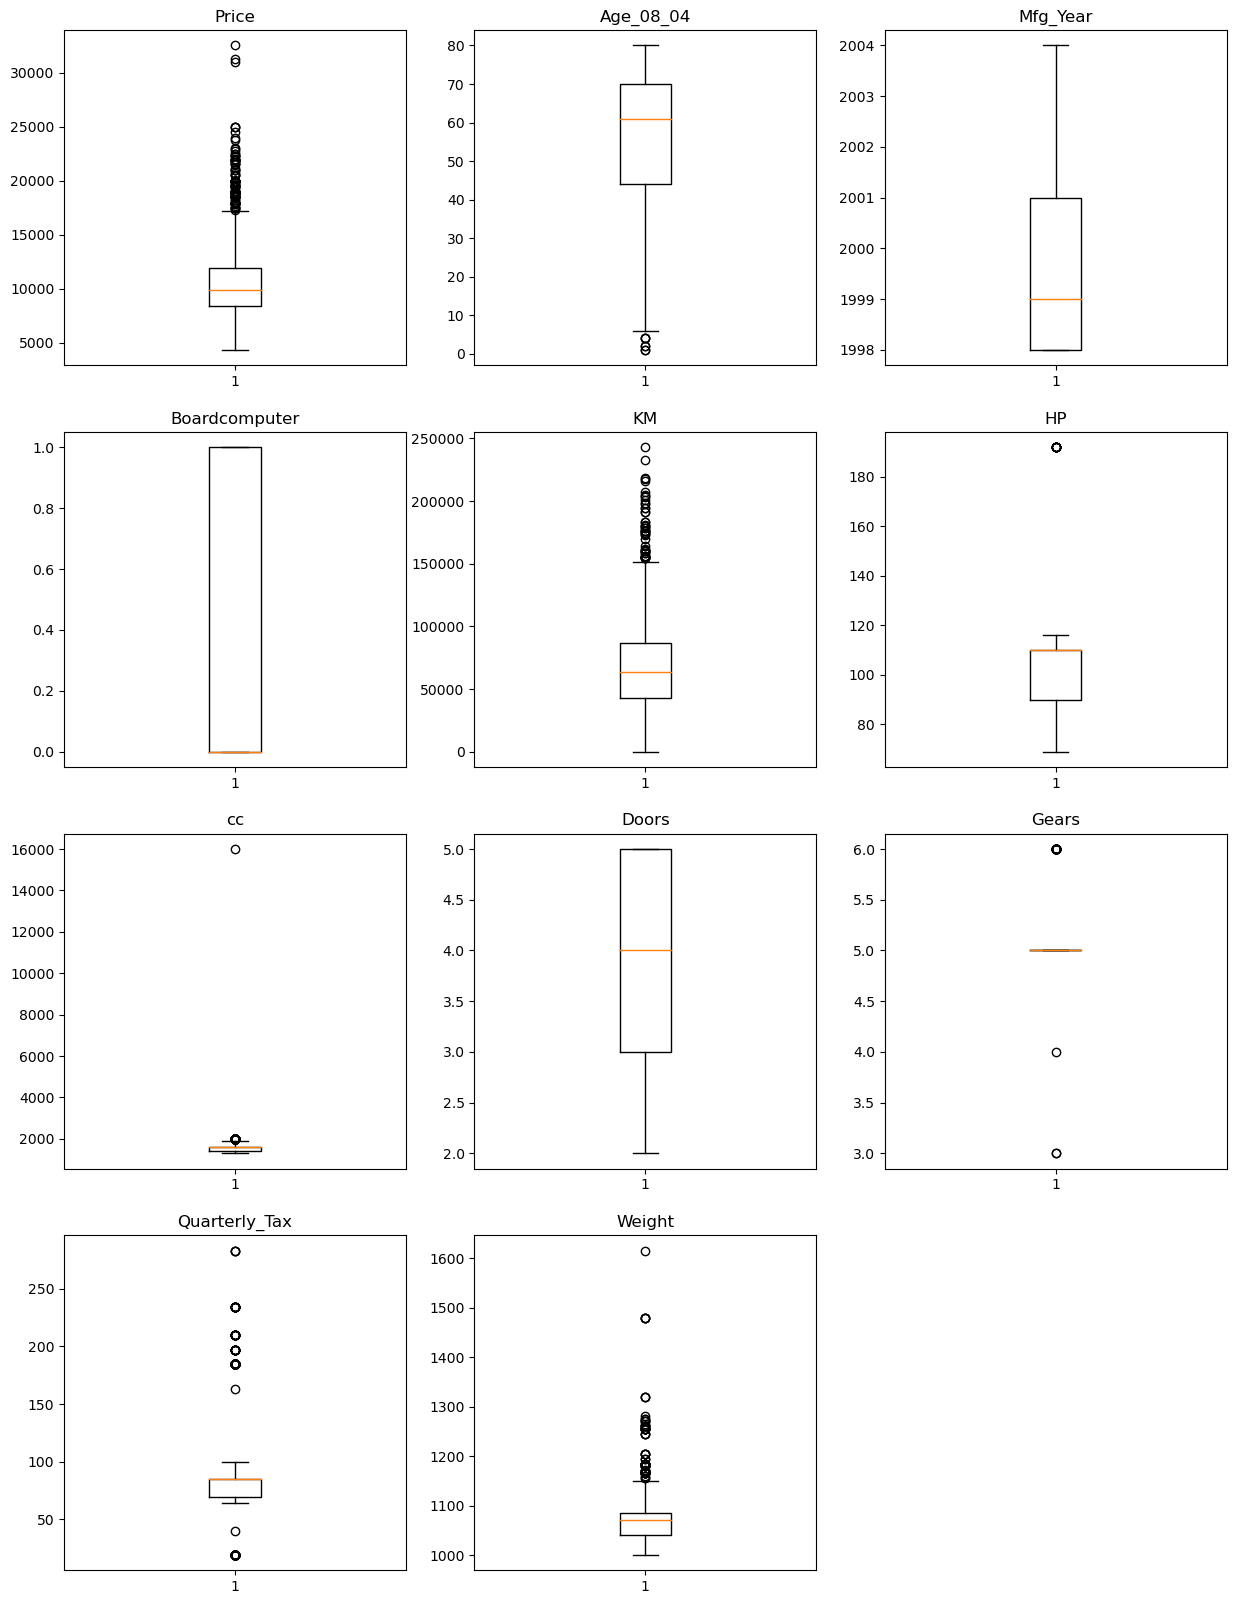

In [12]:
# display boxplots

num_columns = len(data_filtered.columns)
subplots_per_row = 3
num_rows = (num_columns + subplots_per_row - 1) // subplots_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i in range(num_columns):
    ax = axes[i]
    ax.boxplot(data_filtered.iloc[:, i])
    ax.set_title(data_filtered.columns[i])

# Hide any remaining empty subplots
for i in range(num_columns, num_rows * subplots_per_row):
    fig.delaxes(axes[i])

# plt.tight_layout()
plt.show()


#### Treating outliers with IQR



Column Name: Price
     Price  Age_08_04  Mfg_Year  Boardcomputer     KM   HP    cc  Doors  \
Id                                                                        
187  18245          1      2004              1      1  110  1600      5   
526  18950         49      2000              0  49568  110  1600      3   

     Gears  Quarterly_Tax  Weight  
Id                                 
187      5             19    1075  
526      5             19    1105  


Column Name: Age_08_04
     Price  Age_08_04  Mfg_Year  Boardcomputer  KM   HP    cc  Doors  Gears  \
Id                                                                            
186  17795          1      2004              1   1   98  1400      4      5   
187  18245          1      2004              1   1  110  1600      5      5   

     Quarterly_Tax  Weight  
Id                          
186             19    1100  
187             19    1075  


Column Name: Mfg_Year
Empty DataFrame
Columns: [Price, Age_08_04, Mfg_Year

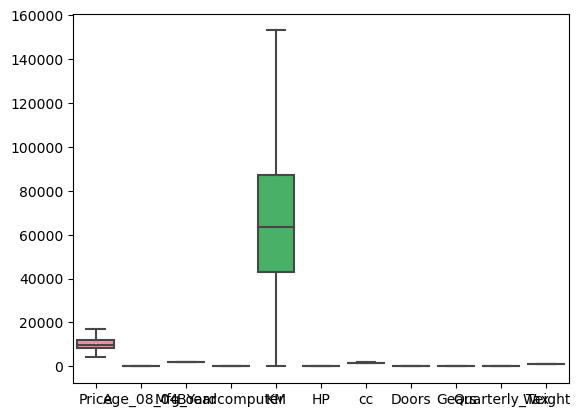

In [13]:
num_columns = len(data_filtered.columns)
new_data = data_filtered.copy()

for i in range(num_columns):
    # print("\n\nColumn Name:",(data_filtered.columns[i]))
    print("\n\nColumn Name: \033[1;34m" + "\033[1m" + data_filtered.columns[i] + "\033[0m")

    # Calculate the IQR
    Q1 = data_filtered.iloc[:, i].quantile(0.25)
    Q3 = data_filtered.iloc[:, i].quantile(0.75)
    IQR = Q3 - Q1
        
    # Identify and mark outliers using IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(data_filtered[(data_filtered.iloc[:, i] > upper_bound) | (data_filtered.iloc[:, i] < lower_bound)].tail(2))
    
    # Changing the outliers
    new_data.loc[(new_data[data_filtered.columns[i]] > upper_bound), data_filtered.columns[i]] = upper_bound
    new_data.loc[(new_data[data_filtered.columns[i]] < lower_bound), data_filtered.columns[i]] = lower_bound
    
    # # Drop rows with outliers
    # outliers = new_data[(new_data.iloc[:, i] < lower_bound) | (new_data.iloc[:, i] > upper_bound)].index   
    # new_data = new_data.drop(outliers)
    
print("\nShape of new data:",new_data.shape)
sns.boxplot(data = new_data)
plt.show()


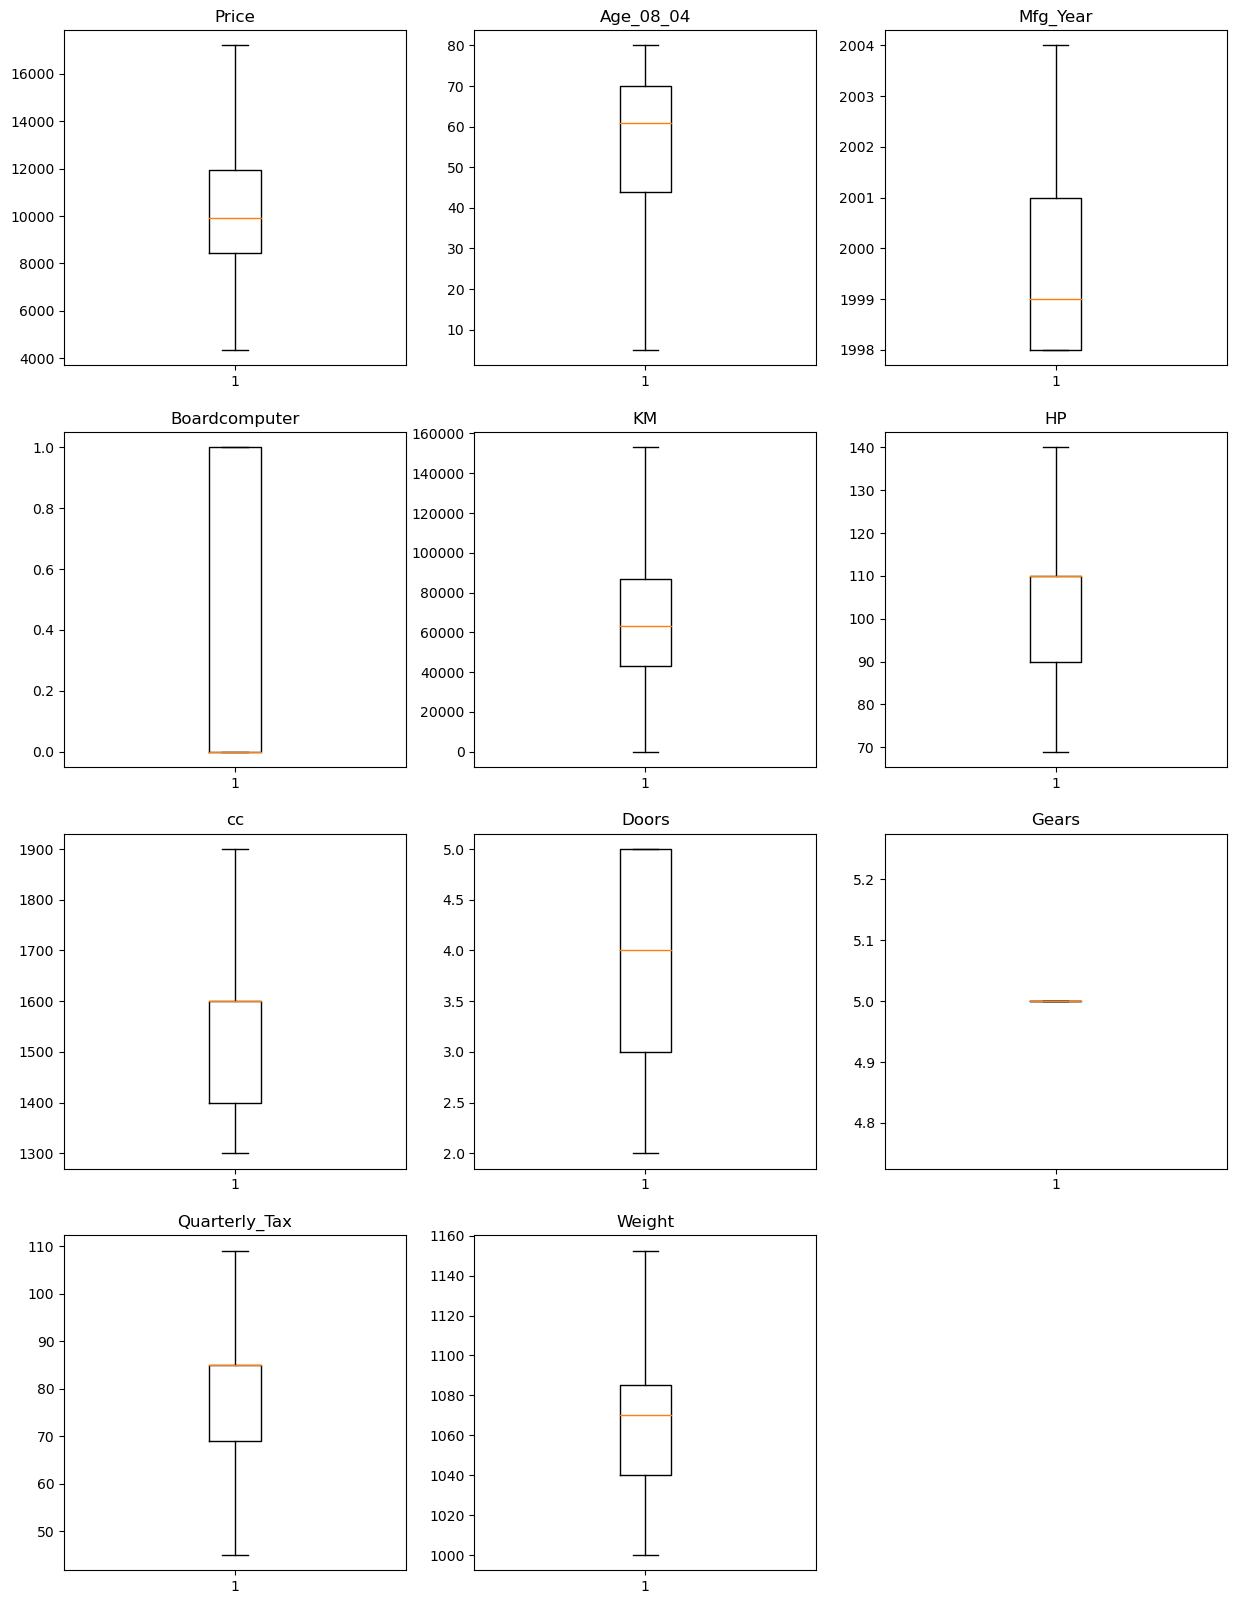

In [14]:
# display boxplots of Treated outliers with IQR

num_columns = len(new_data.columns)
subplots_per_row = 3
num_rows = (num_columns + subplots_per_row - 1) // subplots_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i in range(num_columns):
    ax = axes[i]
    ax.boxplot(new_data.iloc[:, i])
    ax.set_title(new_data.columns[i])

# Hide any remaining empty subplots
for i in range(num_columns, num_rows * subplots_per_row):
    fig.delaxes(axes[i])

# plt.tight_layout()
plt.show()


In [15]:
# to check repeatation iteration
# data_filtered=new_data

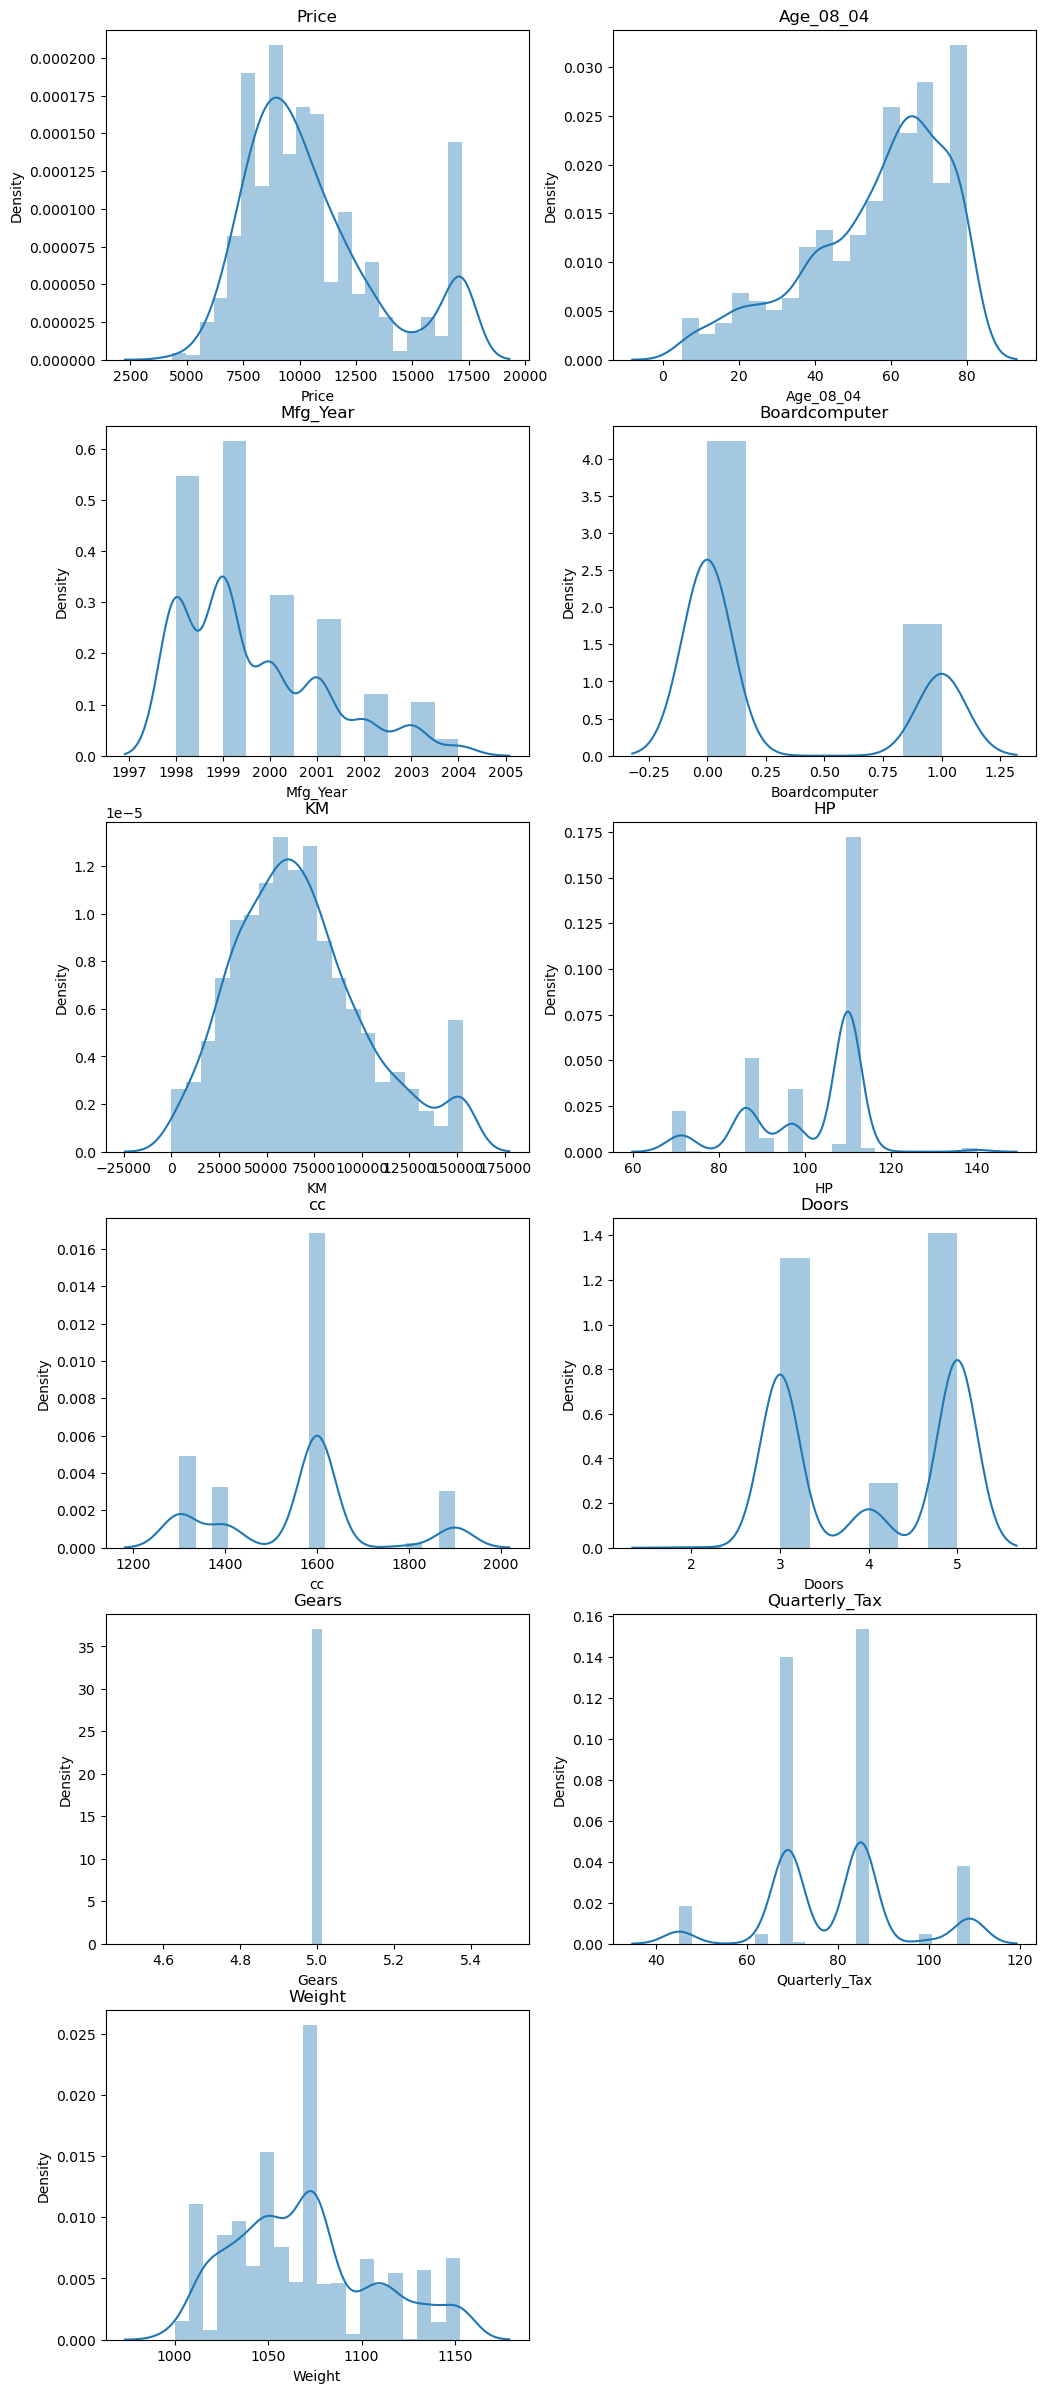

In [16]:
# distribution plots
subplots_per_row = 2
num_rows = (len(new_data.columns) + subplots_per_row - 1) // subplots_per_row
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(12, 5*num_rows))
axes = axes.flatten()

for i, column in enumerate(new_data.columns):
    ax = axes[i]
    sns.distplot(new_data[column], kde=True, ax=ax)
    ax.set_title(column)
    
# Hide any remaining empty subplots
for i in range(len(new_data.columns), num_rows * subplots_per_row):
    fig.delaxes(axes[i])

# plt.tight_layout()
plt.show()


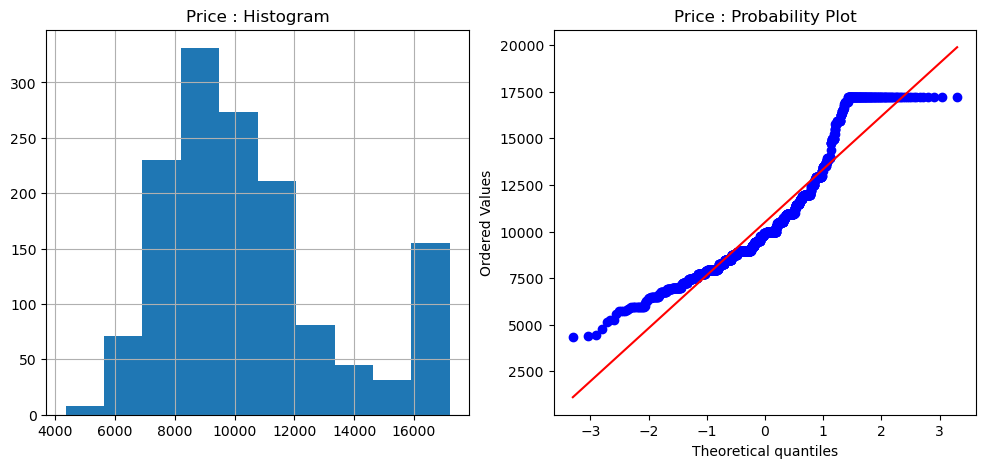

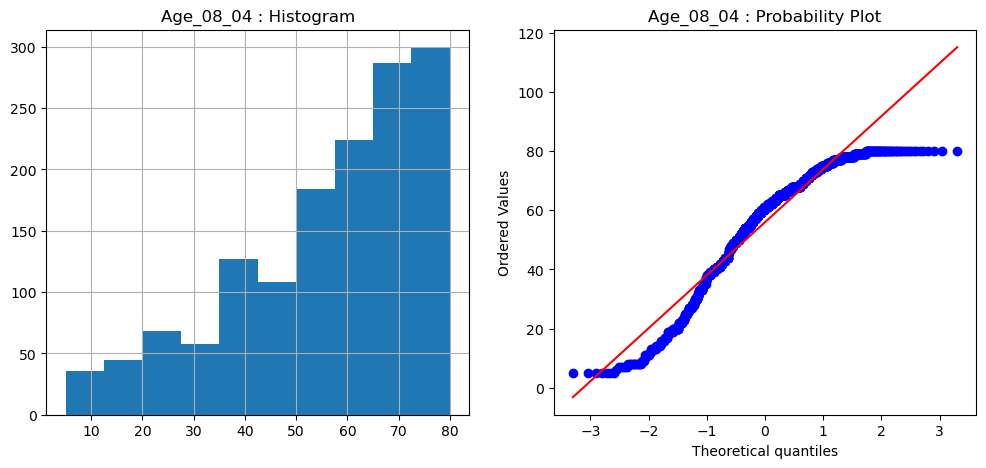

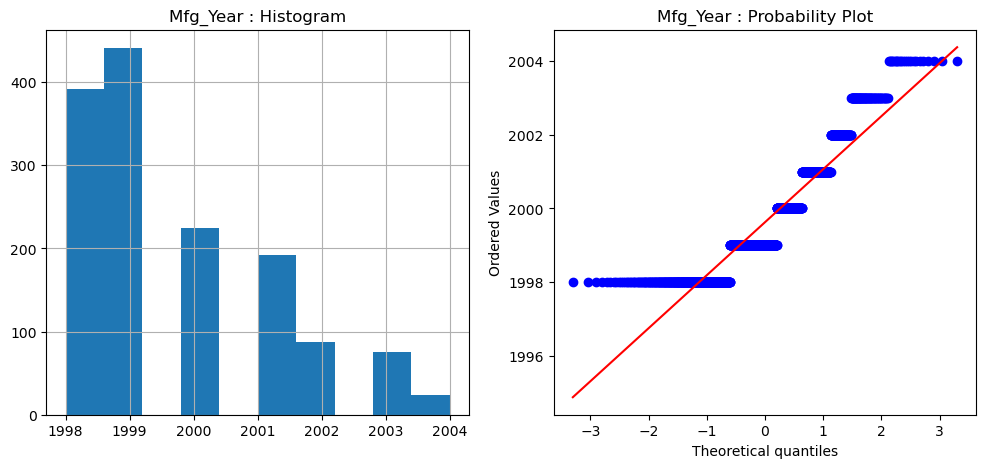

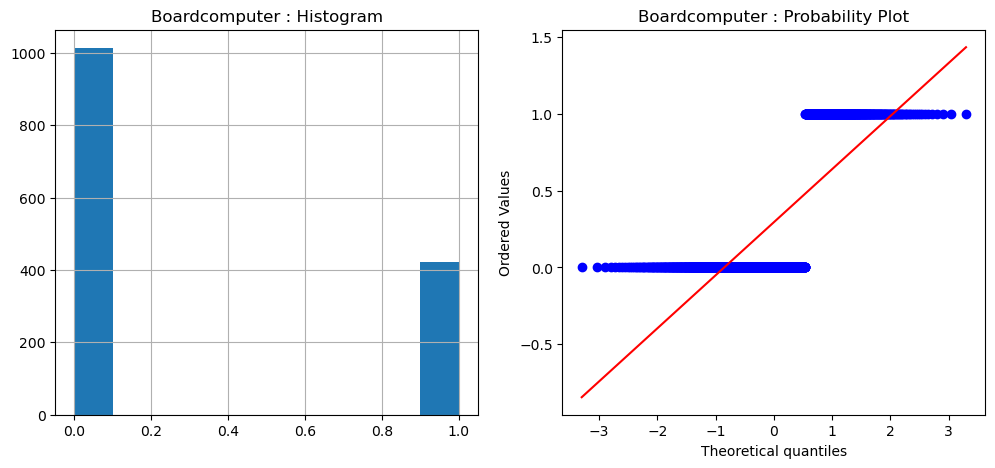

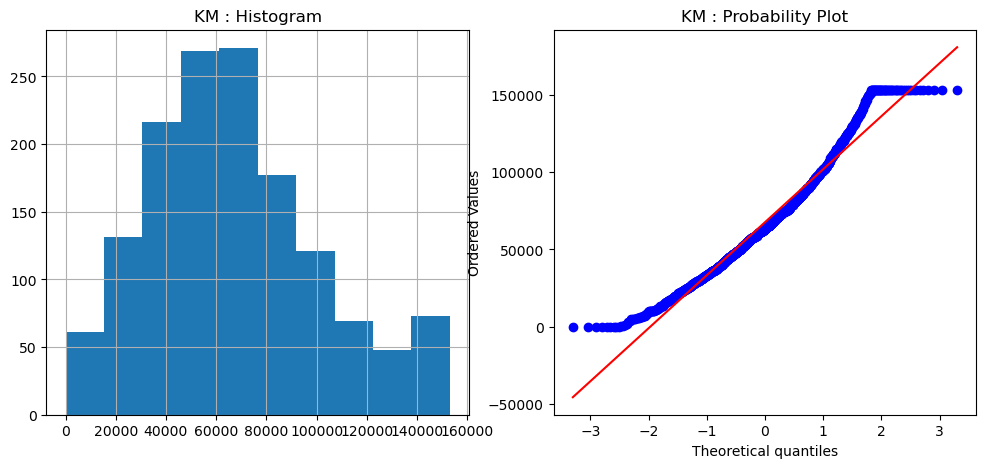

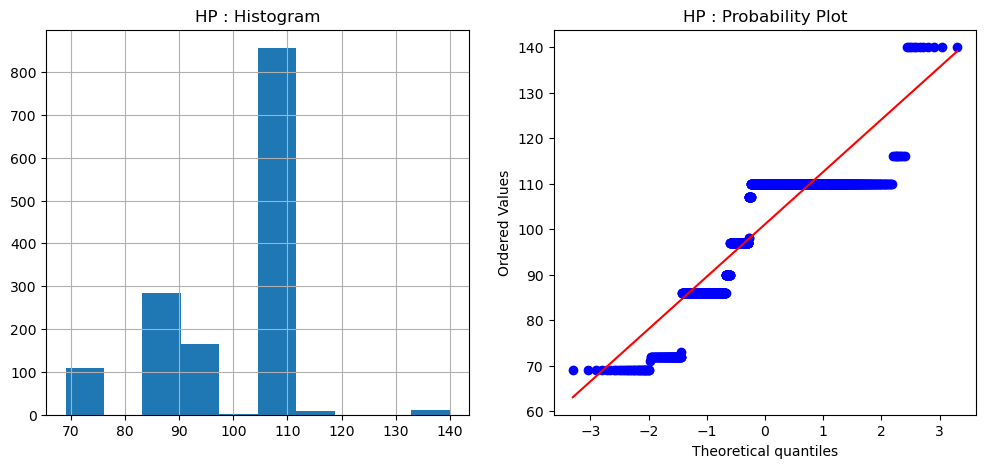

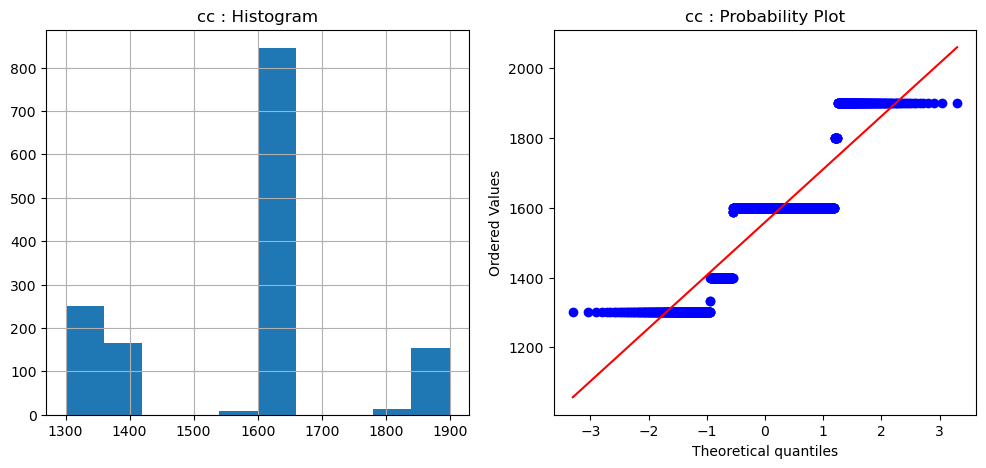

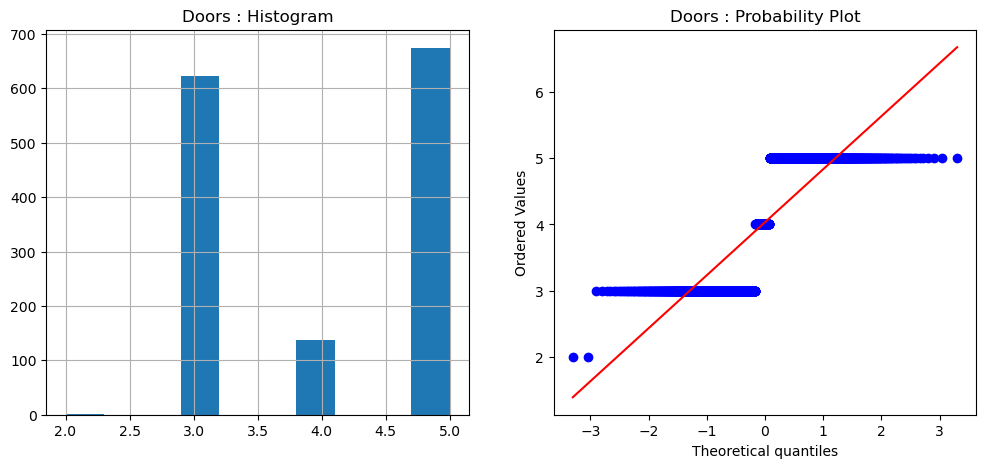

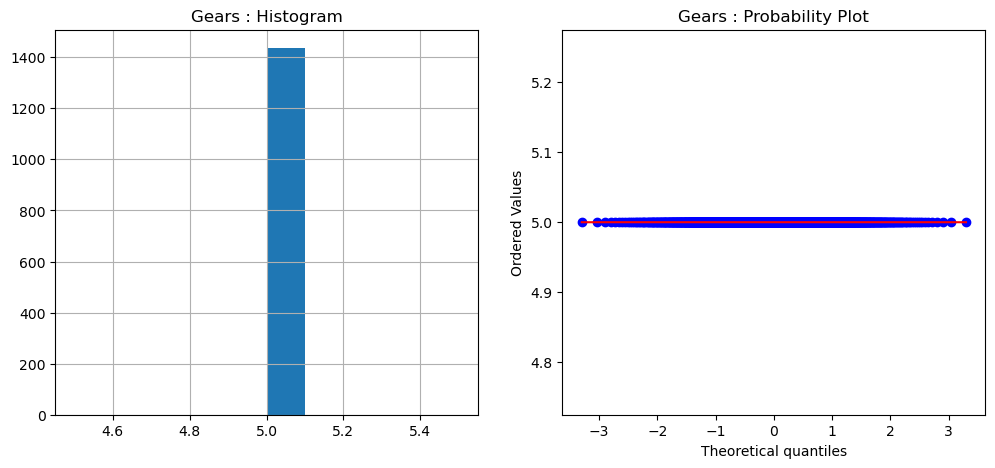

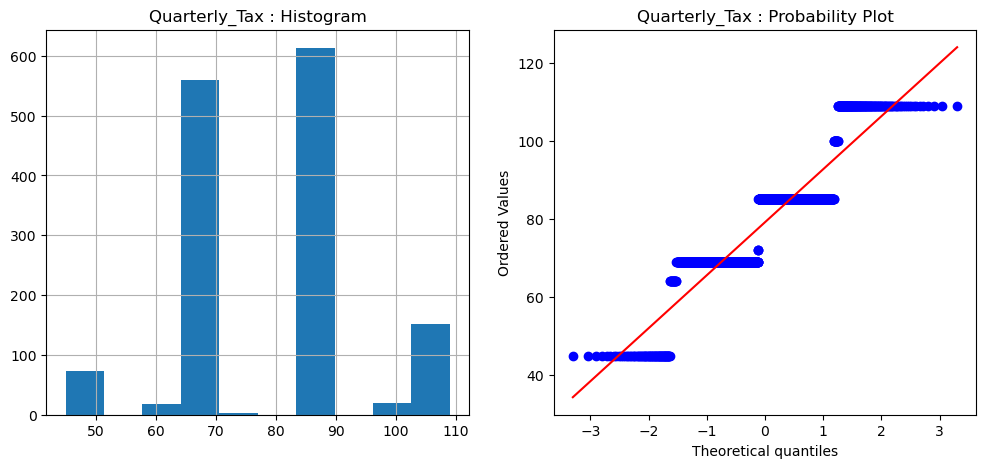

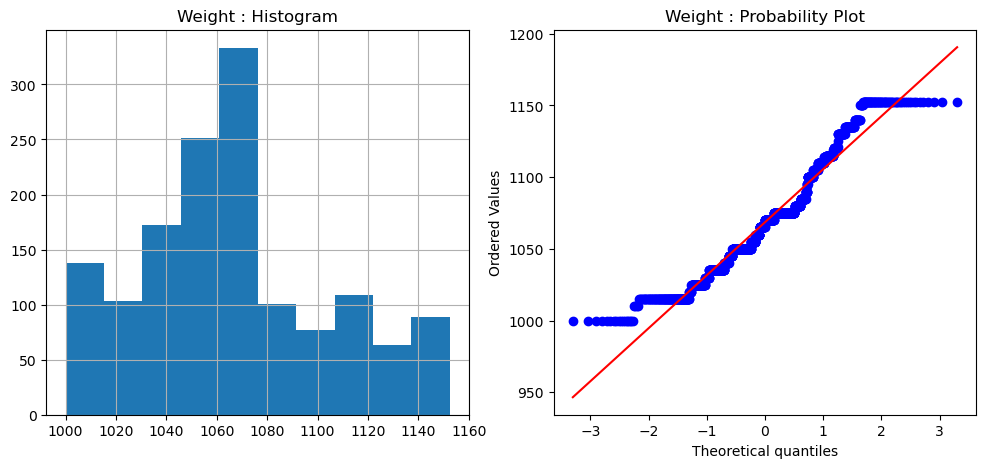

In [17]:
# Histogram & Probability Plot (Q-Q plot)
import pylab

def plot_data(df, feature):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.title(f'{feature} : Histogram')
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.title(f'{feature} : Probability Plot')

# Iterate through all columns
for column in new_data.columns:
    plot_data(new_data, column)
    plt.show()


## Categorical Data

### Labelencoder to convert categorical data into numeric

In [18]:
# Categorical Data
categorical_data = data.select_dtypes(include='object')
print('\nCategorical Data Shape:', categorical_data.shape)
print('Categorical Columns:', categorical_data.columns)


Categorical Data Shape: (1436, 3)
Categorical Columns: Index(['Model', 'Fuel_Type', 'Color'], dtype='object')


      Price  Model  Fuel_Type  Color
Id                                  
1438   7500      5          2      2
1439  10845      8          2      4
1440   8500      8          2      2
1441   7250      8          2      4
1442   6950    163          2      3


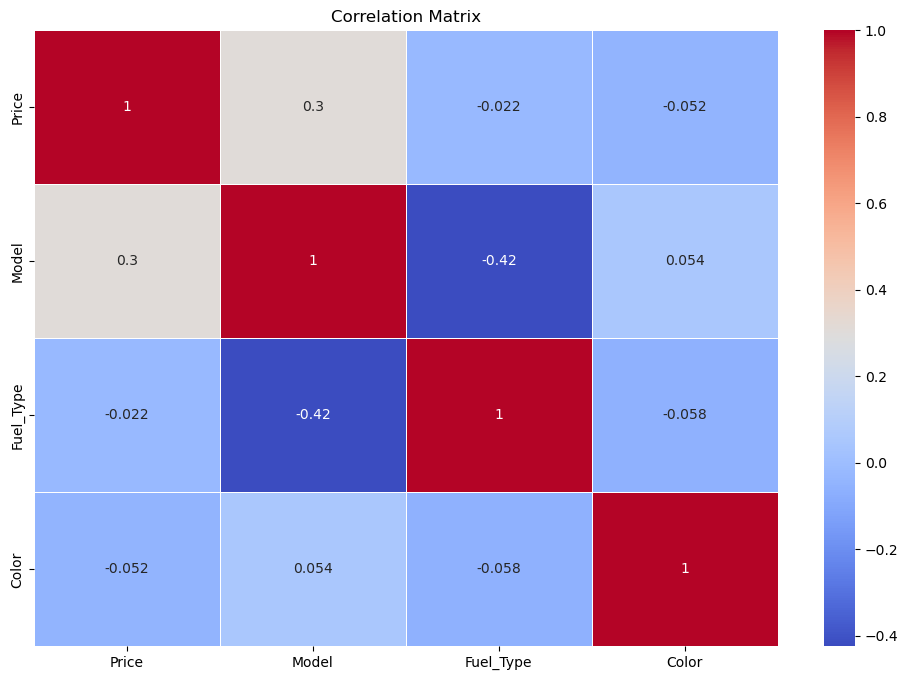

In [19]:
# Label encounder
from sklearn.preprocessing import LabelEncoder
Label = LabelEncoder()
cat_data = data[['Price', 'Model', 'Fuel_Type', 'Color']].copy()
cat_data['Model'] = Label.fit_transform(cat_data['Model'])
cat_data['Fuel_Type'] = Label.fit_transform(cat_data['Fuel_Type'])
cat_data['Color'] = Label.fit_transform(cat_data['Color'])
print(cat_data.tail())

# Correlation Plot
corr_matrix = cat_data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Note: only 'Model' have much influence. Currently not considering Categorical Data

### Feature scaling

In [20]:
from sklearn.preprocessing import StandardScaler
std1 = StandardScaler()
std2 = StandardScaler()
new_data_norm=new_data.copy()
new_data_norm.iloc[:,1:]= std1.fit_transform(new_data.iloc[:,1:].values)
new_data_norm.iloc[:,0] = std2.fit_transform(new_data.iloc[:,0].values.reshape(-1, 1))   #Scaling output data also
# print(new_data_norm.head())
new_data_norm.tail()

,Price,Age_08_04,Mfg_Year,Boardcomputer,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,,,
1438,-1.006662,0.702643,-1.055294,-0.646198,-1.355186,-1.149198,-1.530776,-1.085139,0,-0.691291,-1.15407
1439,0.115529,0.864280,-1.055294,-0.646198,-1.399648,-1.149198,-1.530776,-1.085139,0,-0.691291,-1.41889
1440,-0.671179,0.810401,-1.055294,-0.646198,-1.456780,-1.149198,-1.530776,-1.085139,0,-0.691291,-1.41889
1441,-1.090533,0.756522,-1.055294,-0.646198,-1.459660,-1.149198,-1.530776,-1.085139,0,-0.691291,-1.41889
1442,-1.191178,1.079797,-1.055294,-0.646198,-1.946752,0.676887,0.245303,1.014941,0,-2.322669,1.20283


# Model Building  & Testing

### As per suggestions features, check the accuracy  (raw model)

In [21]:
#data As per suggestions features, ["Price", "Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"] 
dataset=data.rename({'Age_08_04':'Age', 'Quarterly_Tax':'QT'},axis=1)
raw_model = sm.ols("Price~Age+KM+HP+cc+Doors+Gears+QT+Weight", data = dataset).fit()
raw_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:02:12   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
QT             3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# new_data As per suggestions features
dataset=new_data.rename({'Age_08_04':'Age', 'Quarterly_Tax':'QT'},axis=1)
new_data_model = sm.ols("Price~Age+KM+HP+cc+Doors+Gears+QT+Weight", data = dataset).fit()
new_data_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1325.
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:02:12   Log-Likelihood:                -12079.
No. Observations:                1436   AIC:                         2.417e+04
Df Residuals:                    1428   BIC:                         2.422e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -177.5193     53.015     -3.348      0.001    -281.515     -73.524
Age         -106.1334      2.265    -46.865      0.000    -110.576    -101.691
KM            -0.0160      0.001    -13.922      0.000      -0.018      -0.014
HP            29.2304      2.515     11.620      0.000      24.296      34.165
cc            -2.7045      0.295     -9.176      0.000      -3.283      -2.126
Doors       -108.9769     34.443     -3.164      0.002    -176.541     -41.413
Gears       -887.5964    265.074     -3.348      0.001   -1407.573    -367.620
QT            13.5087      2.738      4.933      0.000       8.137      18.880
Weight        21.3084      1.530     13.928      0.000      18.307      24.310
==============================================================================
Omnibus:                       52.500   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.625
Skew:                          -0.113   Prob(JB):                     3.54e-30
Kurtosis:                       4.489   Cond. No.                     2.10e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.88e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Without considering suggestion features, based on correlation condition

In [23]:
# by corr condition - 0.3
corr_matrix = data.corr(numeric_only=True)
significant_correlations1 = corr_matrix[abs(corr_matrix[dependent_variable]) >= 0.3][[dependent_variable]]  
significant_variables1 = significant_correlations1.index.tolist()
print(significant_variables1)

data_signf=data[significant_variables1]
regression_model = linear_model.LinearRegression()
X=data_signf.iloc[:,1:]
y=data_signf.iloc[:,0]
regression_model.fit(X = X, y = y)
score=regression_model.score(X = X, y = y)
print("score:",score)

['Price', 'Age_08_04', 'Mfg_Year', 'KM', 'HP', 'Weight', 'ABS', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows']
score: 0.8946208533902086


### Based on Sklearn LR  (using without scalar data) (data: new_data)

In [24]:
# Initialize model
regression_model = linear_model.LinearRegression()

X=new_data.iloc[:,1:]
y=new_data.iloc[:,0]

# Train the model using the mtcars data
regression_model.fit(X = X, y = y)

# Check trained model y-intercept
print("y-intercept:",regression_model.intercept_)

# Check trained model coefficients
print("model coefficients:",regression_model.coef_)

# Check regression_model.score
score1=regression_model.score(X = X, y = y)
print("score:",score1)

y-intercept: -1804858.4154427967
model coefficients: [-3.47959721e+01  8.98812375e+02 -3.74313206e+01 -1.56710695e-02
  2.80617955e+01 -2.50513962e+00 -1.05708865e+02  1.42108547e-13
  1.33241553e+01  2.01458310e+01]
score: 0.8734412991954285


In [25]:
# Mean Squared Error (MSE) & Root Mean Squared Error (RMSE):
predictions = regression_model.predict(X=X)
predictions = std2.inverse_transform(predictions.reshape(-1, 1))
mse1 = mean_squared_error(new_data['Price'], predictions)
rmse = np.sqrt(mse1)
print("Mean Squared Error:", mse1)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 1048598037116048.4
Root Mean Squared Error: 32382063.509233754


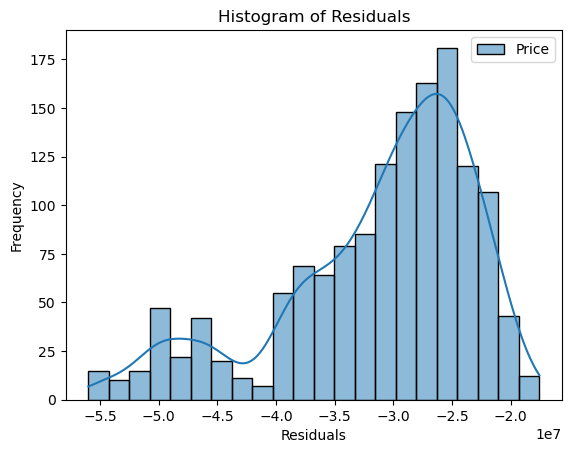

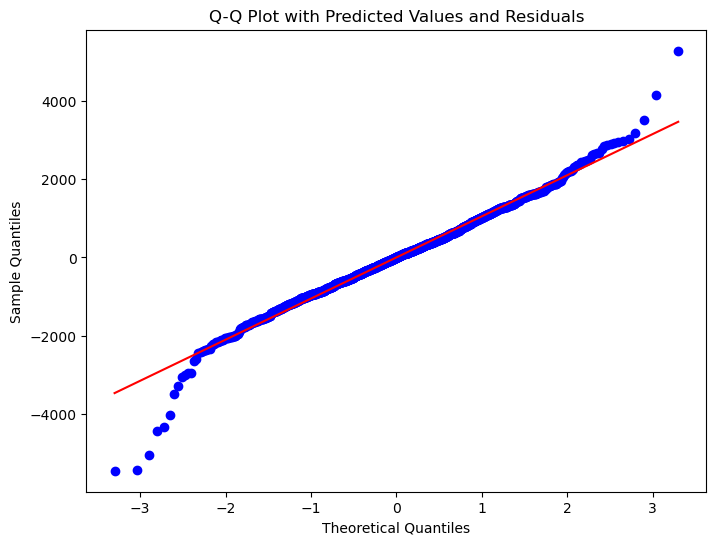

In [26]:
# Residual Analysis
residuals = pd.DataFrame(new_data['Price']) - predictions

# Histogram of Residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Calculate quantiles for residuals and expected quantiles for a normal distribution
residuals_quantiles = np.percentile(residuals, np.arange(0, 100, 1))
expected_quantiles = stats.norm.ppf(np.arange(0, 100, 1) / 100.0, loc=np.mean(residuals), scale=np.std(residuals))

# Create a Q-Q plot with predicted values and residuals
pred = regression_model.predict(X=X)
residuals = y - pred
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot with Predicted Values and Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

### Based on SK learn LR  using standard Scalar Data

In [27]:
# Initialize model
regression_model = linear_model.LinearRegression()

X=new_data_norm.iloc[:,1:]
y=new_data_norm.iloc[:,0]

# Train the model using the mtcars data
regression_model.fit(X = X, y = y)

# Check trained model y-intercept
print("y-intercept:",regression_model.intercept_)

# Check trained model coefficients
print("model coefficients:",regression_model.coef_)

# Check regression_model.score
score2=regression_model.score(X = X, y = y)
print("score:",score2)

y-intercept: -2.4638080883364446e-15
model coefficients: [-0.21666003  0.46442201 -0.00572435 -0.18257041  0.12373041 -0.14195857
 -0.03377353  0.          0.06576081  0.2552142 ]
score: 0.8734412991954302


In [28]:
# Mean Squared Error (MSE) & Root Mean Squared Error (RMSE):
predictions = regression_model.predict(X=X)
predictions = std2.inverse_transform(predictions.reshape(-1, 1))
mse2 = mean_squared_error(new_data['Price'], predictions)
rmse = np.sqrt(mse2)
print("Mean Squared Error:", mse2)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 1124476.7296807677
Root Mean Squared Error: 1060.4134710954816


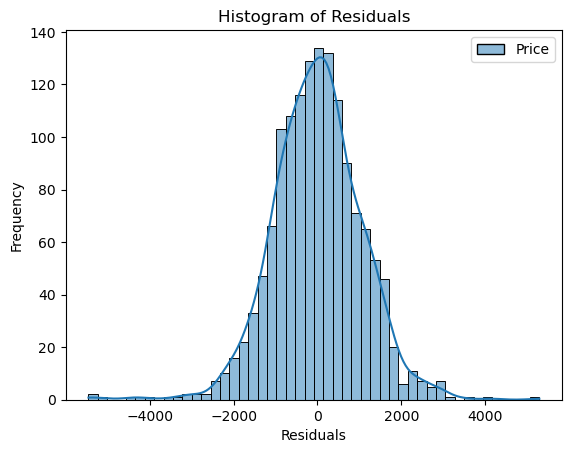

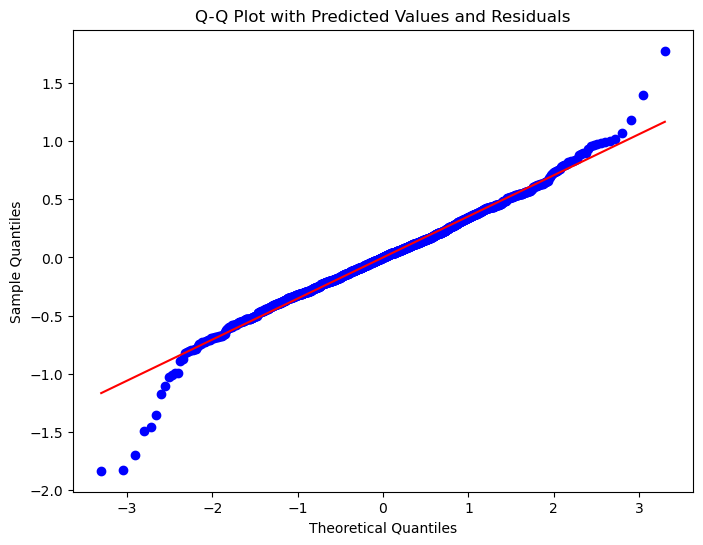

In [29]:
# Residual Analysis
residuals = pd.DataFrame(new_data['Price']) - predictions

# Histogram of Residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Calculate quantiles for residuals and expected quantiles for a normal distribution
residuals_quantiles = np.percentile(residuals, np.arange(0, 100, 1))
expected_quantiles = stats.norm.ppf(np.arange(0, 100, 1) / 100.0, loc=np.mean(residuals), scale=np.std(residuals))

# Create a Q-Q plot with predicted values and residuals
pred = regression_model.predict(X=X)
residuals = y - pred
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot with Predicted Values and Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [30]:
# Compare both method score, mse
print(score1,score2)
print(mse1,mse2)

0.8734412991954285 0.8734412991954302
1048598037116048.4 1124476.7296807677


### Normalizing features

In [31]:
# CustomScaler

#withoutNormalization
class withoutNormalization:
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X 
    def fit_transform(self, X, y=None):      
        self.fit(X, y)
        return self.transform(X)

#Square
class SquareScaler:
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X ** 2 
    def fit_transform(self, X, y=None):      
        self.fit(X, y)
        return self.transform(X)
    
    
#Log
class LogScaler:
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return np.log(X + 1)
    def fit_transform(self, X, y=None):      
        self.fit(X, y)
        return self.transform(X)


scaler_name: without normalization
score: 0.8738432064027576
mse: 1123323.2130952817

scaler_name: Standard Scaler
score: 0.8738432064027551
mse: 1123323.21309451

scaler_name: MinMax Scaler
score: 0.8738432064027536
mse: 1123323.2130945262

scaler_name: Square Transformation
score: 0.8759192864361635
mse: 1122588.854183939

scaler_name: Log Transformation
score: 0.8578224083986453
mse: 1333401.1070849036

 best_scaler: Square Transformation


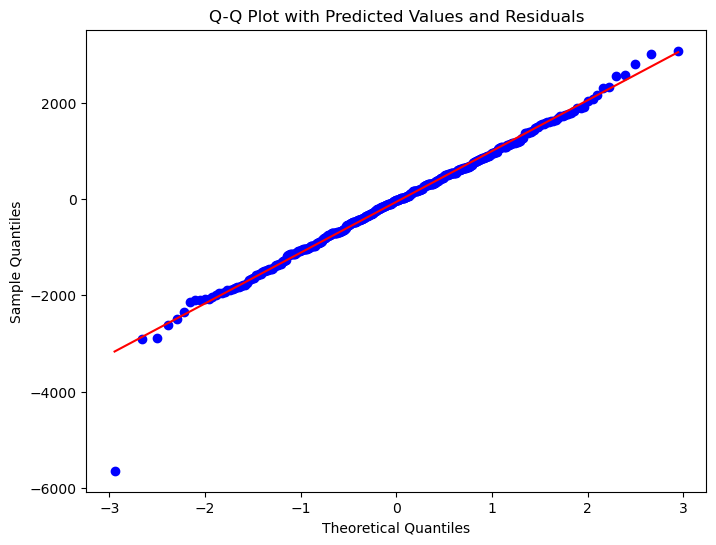

In [32]:
# Normalization to input data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

X=new_data.iloc[:,1:]
y=new_data.iloc[:,0]
# X_train = X
# X_test = X
# y_train= y
# y_test = y 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


results = {}

scalers = {
    'without normalization': withoutNormalization(),
    'Standard Scaler': StandardScaler(),
    'MinMax Scaler': MinMaxScaler(),
    # 'Robust Scaler': RobustScaler(),
    # 'Log Transformation2': PowerTransformer(method='box-cox'),
    'Square Transformation': SquareScaler(),
    'Log Transformation': LogScaler(),
}

for scaler_name, scaler in scalers.items():
    print("\nscaler_name:",scaler_name)
 
    X_train_scaled =X_train.copy()   
    X_train_scaled= scaler.fit_transform(X_train_scaled)
    
    X_test_scaled =X_test.copy()
    X_test_scaled = scaler.transform(X_test_scaled) 
    
    regression_model = LinearRegression()
    regression_model.fit(X_train_scaled, y_train)
    
    # Check regression_model.score
    score=regression_model.score(X = X_train_scaled, 
                       y = y_train)
    print("score:",score)
    
    predictions = regression_model.predict(X_test_scaled)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, predictions)
    print("mse:",mse)

    results[scaler_name] = {'model': regression_model, 'predictions': predictions, 'mse': mse}
    
# Choose the best model based on mse
best_scaler = min(results, key=lambda x: results[x]['mse']); print("\n best_scaler:", best_scaler)
best_model = results[best_scaler]['model']   
best_predictions = results[best_scaler]['predictions']

# Create a Q-Q plot with predicted values and residuals
residuals = y_test - best_predictions
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot with Predicted Values and Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

The best model is obtained using the ____________ normalization.  

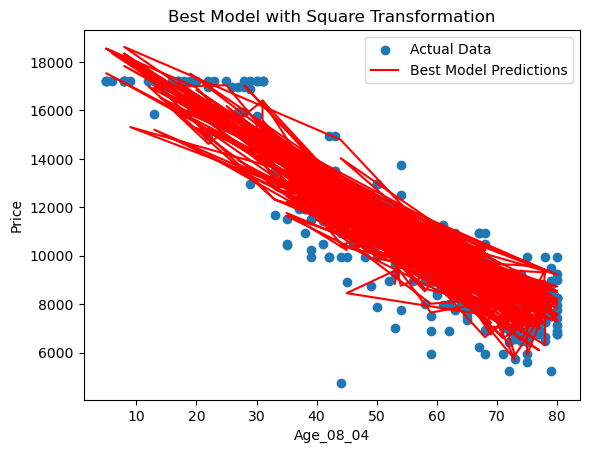

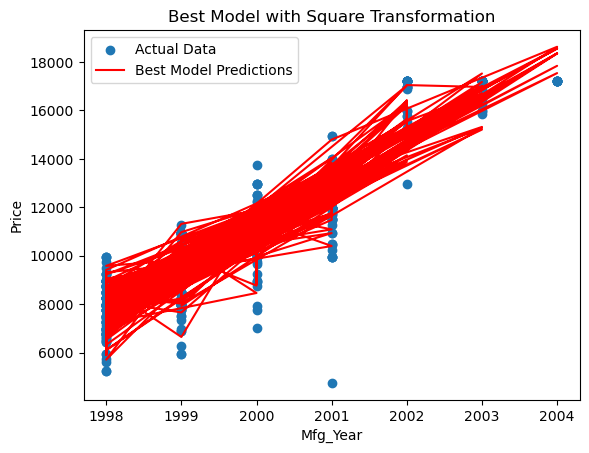

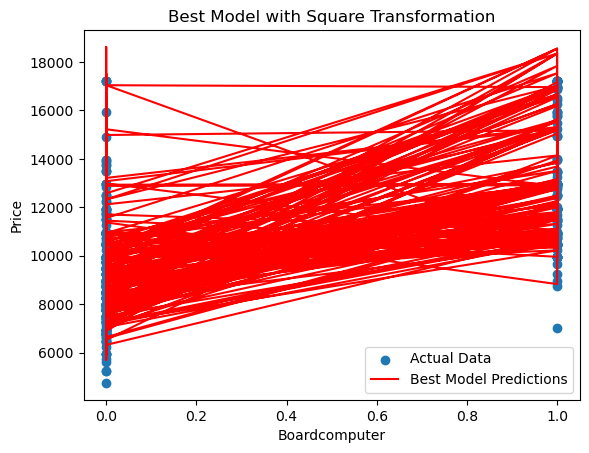

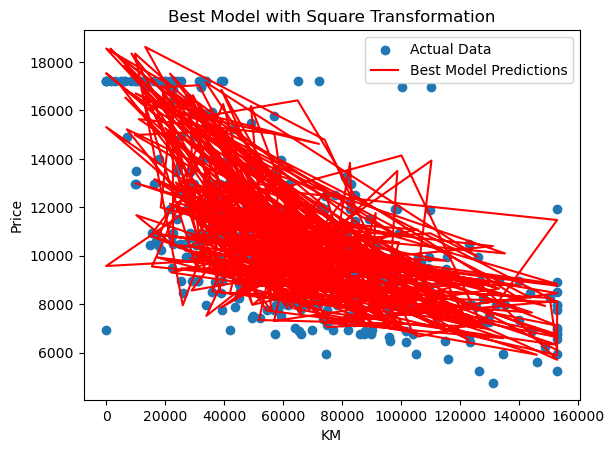

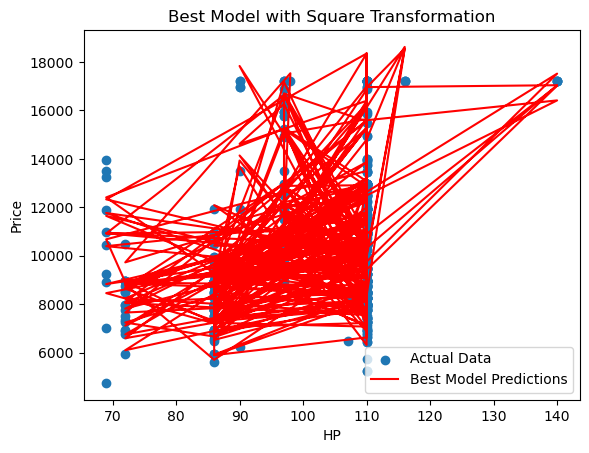

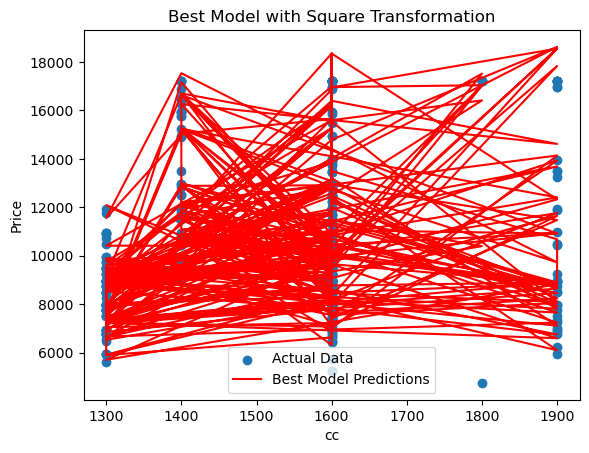

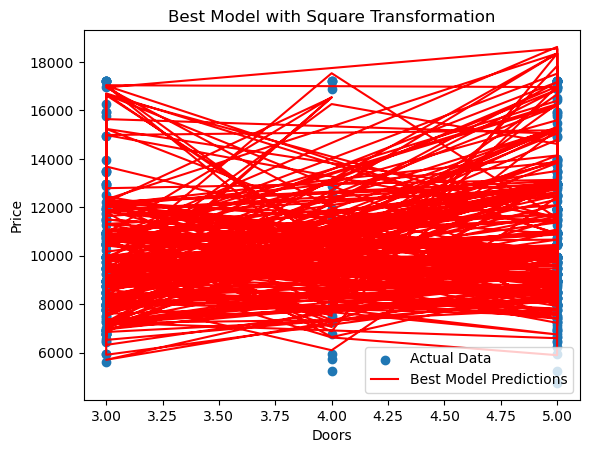

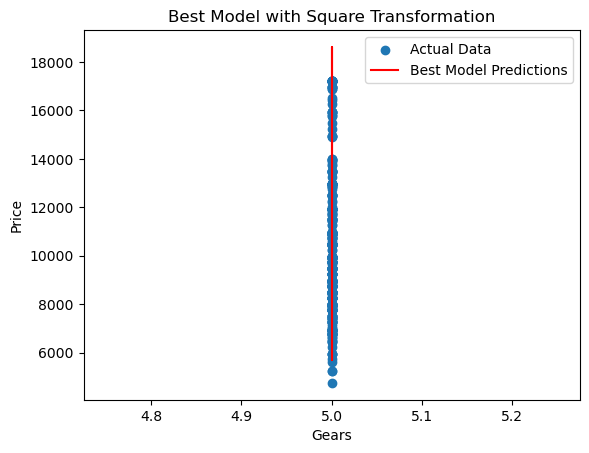

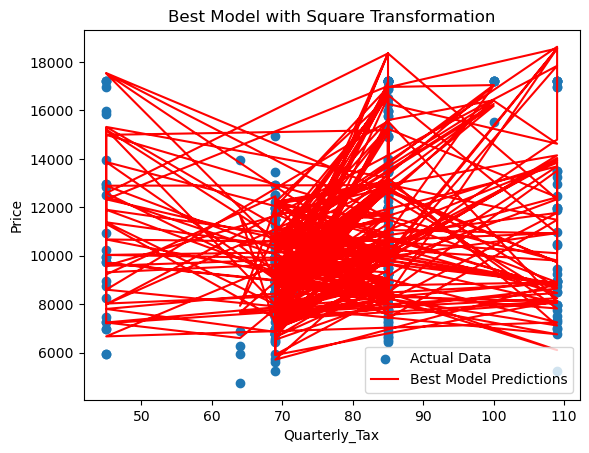

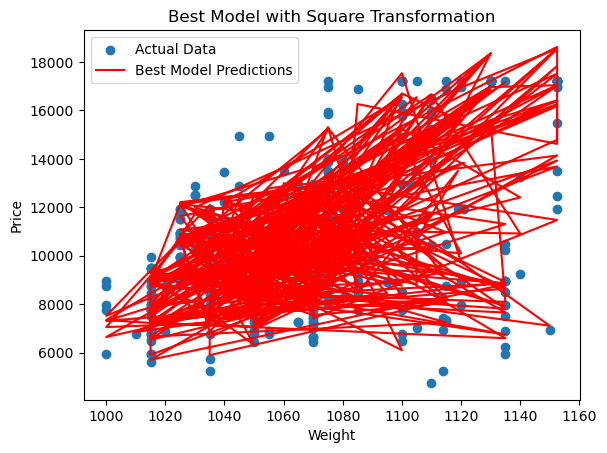

In [33]:
# Visualize the best model's predictions
for i, column in enumerate(X_test.columns):

    plt.scatter(X_test[column], y_test, label='Actual Data')
    plt.plot(X_test[column], best_predictions, label='Best Model Predictions', color='red')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.legend()
    plt.title(f'Best Model with {best_scaler}')
    plt.show()

In [34]:
# Final output comparison
X_scaled = X
scaler = scalers[best_scaler]
X_scaled = scaler.fit_transform(X)
predictions_new = best_model.predict(X_scaled)
new_data2=new_data.copy()
new_data2['Price_pred']=pd.DataFrame(predictions_new,columns=['Price'])

new_data2.head()

,Price,Age_08_04,Mfg_Year,Boardcomputer,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price_pred
Id,,,,,,,,,,,,
1,13500,23,2002.0,1.0,46986.0,90,1900,3,5,109,1152.5,14833.616126
2,13750,23,2002.0,1.0,72937.0,90,1900,3,5,109,1152.5,15188.824057
3,13950,24,2002.0,1.0,41711.0,90,1900,3,5,109,1152.5,15134.277120
4,14950,26,2002.0,1.0,48000.0,90,1900,3,5,109,1152.5,15218.654534
5,13750,30,2002.0,1.0,38500.0,90,1900,3,5,109,1152.5,14998.570995


## Model Predictions

In [35]:
# New Data
X_new = new_data.iloc[0:10,1:]
X_new1 = X_new.copy()
X_new1.reset_index(drop=True, inplace=True)

# X_new['model'] = Label.fit_transform(X_new['model'])   # Lable encounder
X_scaled = X_new.copy()
scaler = scalers[best_scaler]
X_scaled = scaler.fit_transform(X_new) 
predictions_new = best_model.predict(X_scaled)
predictions_new=pd.DataFrame(predictions_new,columns=['Price'])

predicted = pd.concat([X_new1,predictions_new],axis=1)
predicted

,Age_08_04,Mfg_Year,Boardcomputer,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,2002.0,1.0,46986.0,90,1900,3,5,109,1152.5,15141.856418
1,23,2002.0,1.0,72937.0,90,1900,3,5,109,1152.5,14833.616126
2,24,2002.0,1.0,41711.0,90,1900,3,5,109,1152.5,15188.824057
3,26,2002.0,1.0,48000.0,90,1900,3,5,109,1152.5,15134.277120
4,30,2002.0,1.0,38500.0,90,1900,3,5,109,1152.5,15218.654534
5,32,2002.0,1.0,61000.0,90,1900,3,5,109,1152.5,14998.570995
6,27,2002.0,1.0,94612.0,90,1900,3,5,109,1152.5,14476.588731
7,30,2002.0,1.0,75889.0,90,1900,3,5,109,1152.5,14795.049670
8,27,2002.0,0.0,19700.0,140,1800,3,5,100,1152.5,17101.560001
9,23,2002.0,1.0,71138.0,69,1900,3,5,109,1105.0,13324.845867
